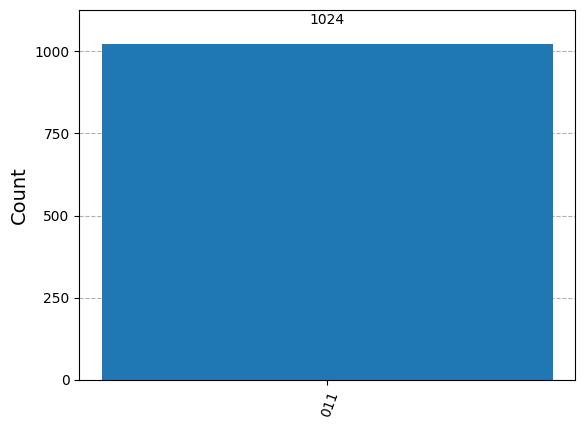

In [21]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# 定义 Oracle
def oracle(circuit, qubits, target_state):
    # 标记目标状态 
    circuit.ccx(qubits[0], qubits[1], qubits[2])

# 定义扩散算子
def diffusion_operator(circuit, qubits):
        circuit.h(qubits[0])
        circuit.h(qubits[1])
        circuit.x(qubits[0])
        circuit.x(qubits[1])
        circuit.h(qubits[1])
        circuit.cx(qubits[0], qubits[1])
        circuit.h(qubits[1])
        circuit.x(qubits[0])
        circuit.x(qubits[1])
        circuit.h(qubits[0])
        circuit.h(qubits[1])

# 创建 Grover 电路
n = 3
grover_circuit = QuantumCircuit(n, n)

# 初始化量子比特
grover_circuit.x(2)
for qubit in range(n):
    grover_circuit.h(qubit)

# 应用 Oracle 和扩散算子
num = 1  # Grover 迭代次数
for _ in range(num):
    oracle(grover_circuit, [0, 1, 2], '101')
    diffusion_operator(grover_circuit, [0, 1, 2])

# 测量
grover_circuit.measure([0, 1], [0, 1])

# 绘制电路
grover_circuit.draw(output='mpl', filename='grover_circuit.png')

# 模拟器运行
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
result = aer_sim.run(transpiled_grover_circuit).result()
counts = result.get_counts(grover_circuit)

# 绘制直方图
plot_histogram(counts)

┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘

[-0.1767767 -6.49467042e-17j -0.1767767 -4.32978028e-17j
 -0.1767767 -8.65956056e-17j -0.1767767 -1.08244507e-16j
 -0.1767767 -8.65956056e-17j -0.1767767 -1.08244507e-16j
 -0.1767767 -6.49467042e-17j -0.88388348-5.62871437e-16j]
{'000': 0.03125, '100': 0.03125, '010': 0.03125, '110': 0.03125, '001': 0.03125, '101': 0.03125, '011': 0.03125, '111': 0.781250000000001}


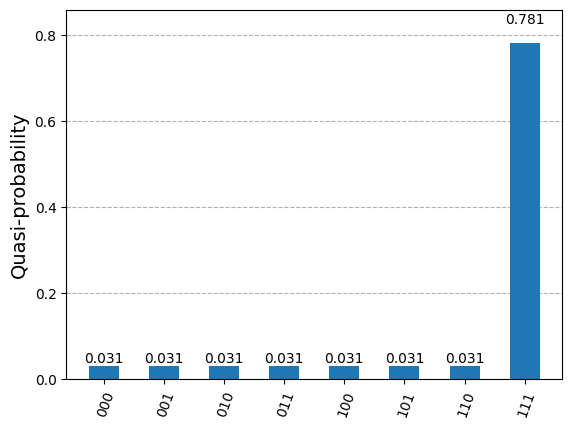

In [23]:
 #initialization
 import numpy as np
 # importing Qiskit
 from qiskit import QuantumCircuit, transpile, quantum_info
 from qiskit_aer import QasmSimulator
 from qiskit import ClassicalRegister, QuantumRegister
 from IPython.display import display
 # import basic plot tools
 from qiskit.visualization import plot_histogram
 # reverse the bit sequence of the nb-bit integer t
 def rbits(t,nb):
    m = nb-1
    k = 0
    while t > 0:
        k |= (t & 1) << m
        t >>= 1
        m -= 1
    return k
 # exchange the elements in the vector v based on the reverse bits of indices
 def rv(v,nb) : 
    newv = np.copy(v)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newv[i] = v[ni] 
    return newv
 # exchange the diagonal elements in the matrix m based on the reverse bits of indices
 def rdm(m, nb) : 
    newm = np.copy(m)
    for i in range(1<<nb):
        ni = rbits(i,nb)
        newm[i][i] = m[ni][ni]
    return newm 
n = 3
 def Oracle():  ## select q0 q1 q2: 111
    oc = QuantumCircuit(n)
    # use ccx and H-gates to achieve ccz
    oc.h(2)
    oc.ccx(0,1,2)
    oc.h(2)
    return oc
 def A(nb): ## amplitude amplification via fliiping around the mean 
    ac = QuantumCircuit(nb)
    ac.h(range(nb))
    ac.x(range(nb))
    # Do multi-controlled-Z gate
    ac.h(nb-1)
    ac.mcx(list(range(nb-1)), nb-1)  # multi-controlled
    ac.h(nb-1)
    ac.x(range(nb))
    ac.h(range(nb))
    return ac
qc = QuantumCircuit(n)
 qc.h(range(n))
 # construct the Oracle_Amplication circuits
 OA = QuantumCircuit(n)
 # query the Oracle
 OA.compose(Oracle(), inplace=True)
 # amplitude magnification
 OA.compose(A(n),inplace=True)
 # put the OA after the H-gates
 qc.compose(OA,inplace=True)
 # Draw the circuit
 display(qc.draw())
 # Do NOT call measure() because we want to see the probability amplitudes in the statevector
 qc.save_statevector()
 # Use Aer’s qasm_simulator
 simulator = QasmSimulator()
 # compile the circuit down to low-level QASM instructions
 compiled_circuit = transpile(qc, simulator)
 # Execute the circuit on the qasm simulator
 job = simulator.run(compiled_circuit, shots=1000)
 # Grab results from the job
 result = job.result()
 out_state = result.get_statevector()
 print(rv(out_state.data,n))
 counts = result.get_counts()
 # we have to reverse the string in the dictionary counts 
answer = {}
 for str in counts:
    answer[str[::-1]] = counts[str]
 print(answer)
 plot_histogram(answer)


┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘

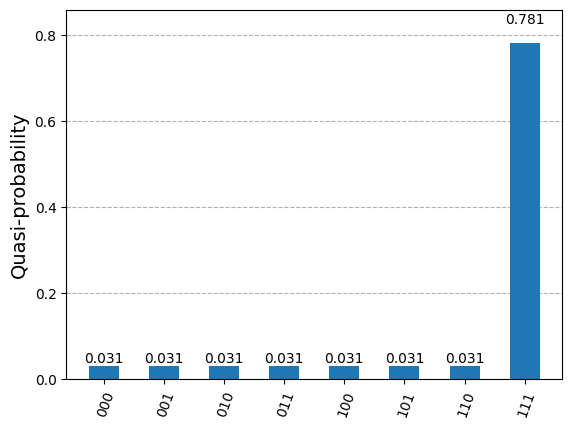

In [45]:
 #initialization
 import numpy as np
 # importing Qiskit
 from qiskit import QuantumCircuit, transpile, quantum_info
 from qiskit_aer import QasmSimulator
 from qiskit import ClassicalRegister, QuantumRegister
 from qiskit.visualization import plot_histogram
 n = 3
 def Oracle():  ## select q0 q1 q2: 111
    oc = QuantumCircuit(n)
    # use ccx and H-gates to achieve ccz
    oc.h(2)
    oc.ccx(0,1,2)
    oc.h(2)
    return oc
 def A(nb): ## amplitude amplification via fliiping around the mean 
    ac = QuantumCircuit(nb)
    ac.h(range(nb))
    ac.x(range(nb))
    # Do multi-controlled-Z gate
    ac.h(nb-1)
    ac.mcx(list(range(nb-1)), nb-1)  # multi-controlled
    ac.h(nb-1)
    ac.x(range(nb))
    ac.h(range(nb))
    return ac
 qc = QuantumCircuit(n)
 qc.h(range(n))
 # construct the Oracle_Amplication circuits
 OA = QuantumCircuit(n)
 # query the Oracle
 OA.compose(Oracle(), inplace=True)
 # amplitude magnification
 OA.compose(A(n),inplace=True)
 # put the OA after the H-gates
 qc.compose(OA,inplace=True)
 # Draw the circuit
 display(qc.draw())
 # Do NOT call measure() because we want to see the probability amplitudes in the statevector
 qc.save_statevector()
 # Use Aer’s qasm_simulator
 simulator = QasmSimulator()
 # compile the circuit down to low-level QASM instructions
 compiled_circuit = transpile(qc, simulator)
 # Execute the circuit on the qasm simulator
 job = simulator.run(compiled_circuit, shots=1000)
 # Grab results from the job
 result = job.result()
 out_state = result.get_statevector()
 counts = result.get_counts()
 # we have to reverse the string in the dictionary counts 
 answer = {}
 for str in counts:
    answer[str[::-1]] = counts[str]
 plot_histogram(answer)